In [75]:
import pandas
import json
import seaborn as sns
import numpy as np

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
data=pandas.read_csv('questions.csv')

In [167]:
data

,qid,type,col4,param,col6,col7,col8,col9,value
0,3724,title,NaN,NaN,NaN,NaN,NaN,NaN,HR-Q1002B: Strengths
1,3724,attempts,0.0,score,NaN,NaN,NaN,NaN,63
2,3724,attempts,0.0,speed,score,NaN,NaN,NaN,100
3,3724,attempts,0.0,speed,feedback,NaN,NaN,NaN,Excellent! Pleasant speed
4,3724,attempts,0.0,speed,utterance_rate,NaN,NaN,NaN,132
...,...,...,...,...,...,...,...,...,...
23640554,3645,attempts,0.0,audiopenalty,NaN,NaN,NaN,NaN,0
23640555,3645,attempts,0.0,wordlimitpenalty,NaN,NaN,NaN,NaN,10
23640556,3645,attempts,0.0,wordqualitypenalty,NaN,NaN,NaN,NaN,3
23640557,3645,attempts,0.0,requiredtextpenalty,NaN,NaN,NaN,NaN,0


In [23]:
qnos=data[data['type'].isin(['title'])]['qid'].unique()
questions=data[data['type'].isin(['title'])]['value'].tolist()
qdict={}
for i in range(len(qnos)):
    qdict[qnos[i]]=questions[i]

In [10]:
score_param_list=['speed', 'fluency', 'grammar', 
       'engagement', 'intonation', 'correctness',
       'pronunciation']

In [235]:
def concat_list_to_df(MyDf,MyList,item):
    if(len(MyDf)==0):
        MyDf[item]=MyList
    else:
        df_len=len(MyDf.index)
        lst_len=len(MyList)
        if(df_len==lst_len):
            MyDf[item]=MyList
        elif(df_len>lst_len):
            MyList=np.append(MyList,np.repeat(np.nan,df_len-lst_len))
            MyDf[item]=MyList
        else:
            for i in range(lst_len-df_len):
                temp_row=np.repeat(np.nan,len(MyDf.columns))
                MyDf.loc[len(MyDf)]=temp_row
            MyDf[item]=MyList
    return MyDf

HR-Q1002B: Strengths


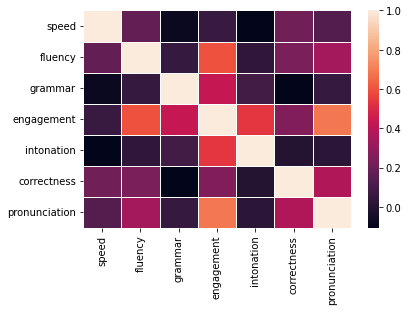

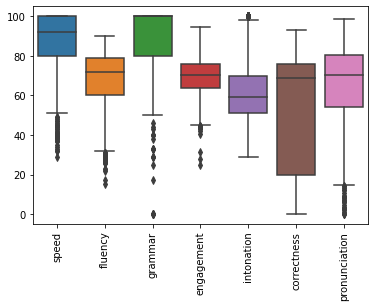

HR-Q1010B: Career goal


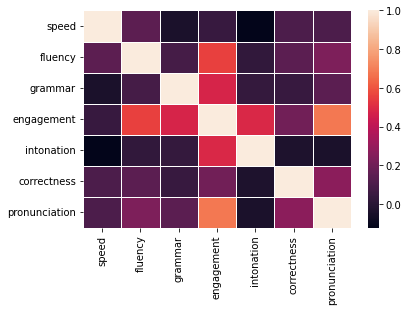

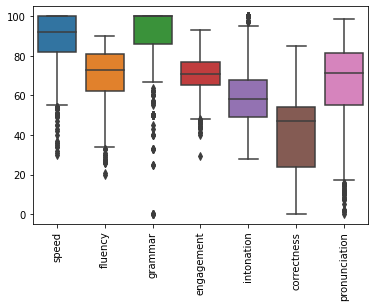

HR-Q1007B: Company Knowledge


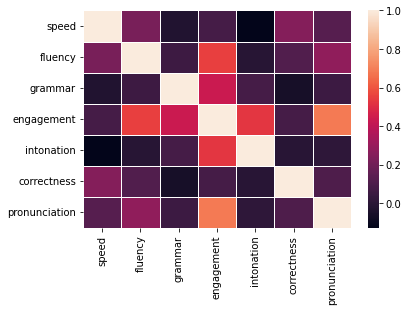

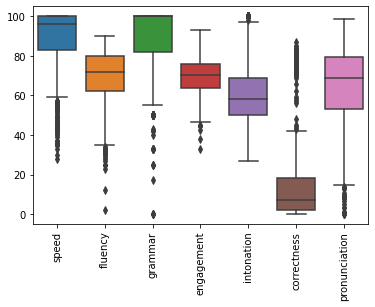

CS-Q1005B: OOP


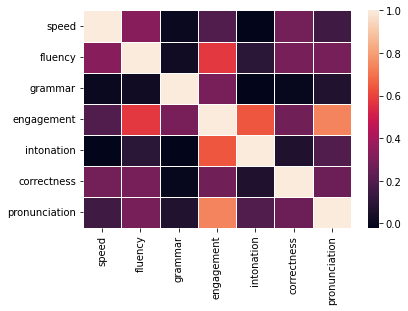

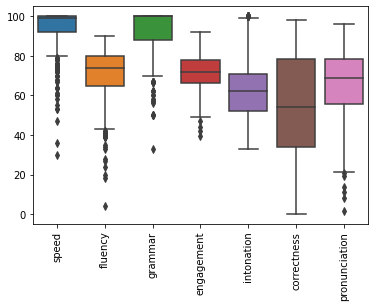

CS-Q1003B: Pointers in C


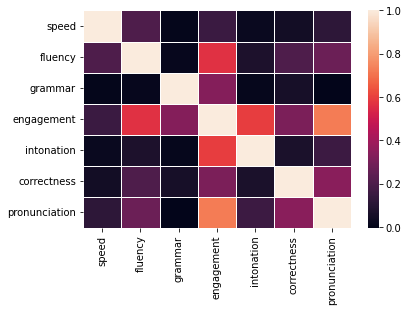

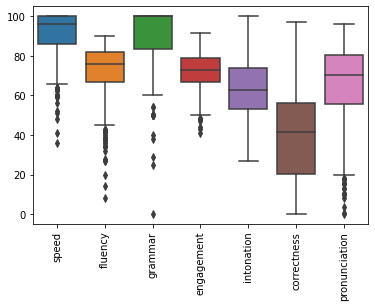

CS-Q1010B: ML applications


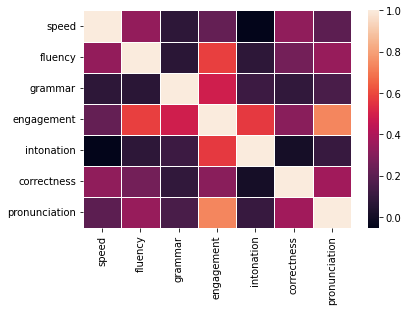

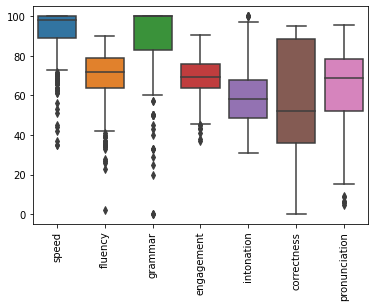

General knowledge:  Largest Industries in India by Market Cap


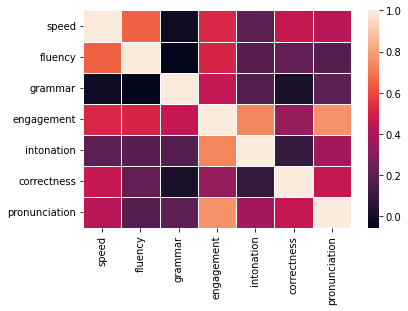

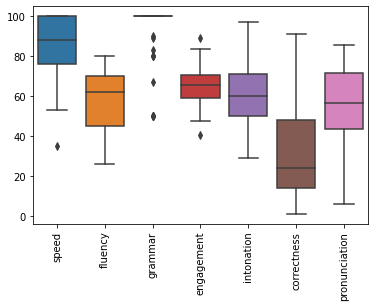

Physics GK: The size of the Universe.


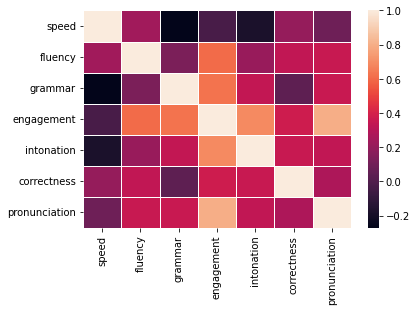

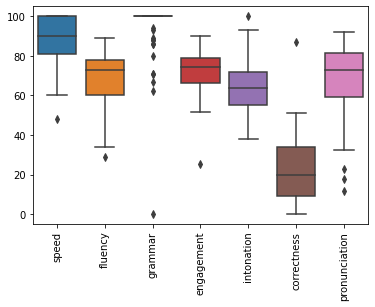

General Knowledge: How do the seasons change?


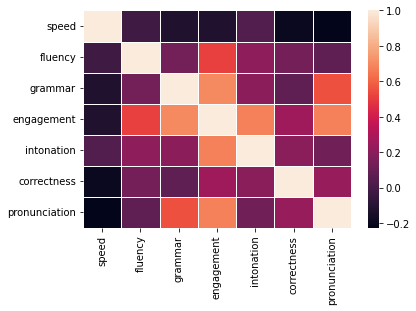

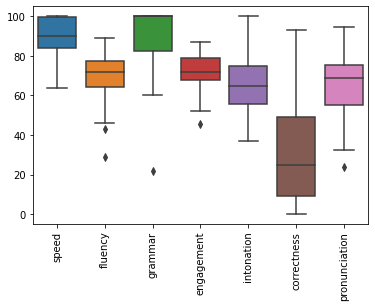

Mockathon: Listening Comprehension MCQ


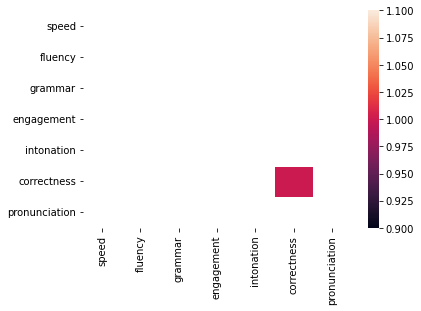

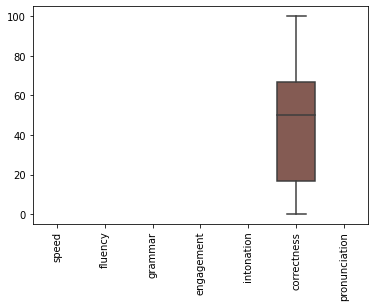

Mockathon: Reading Comprehension MCQ


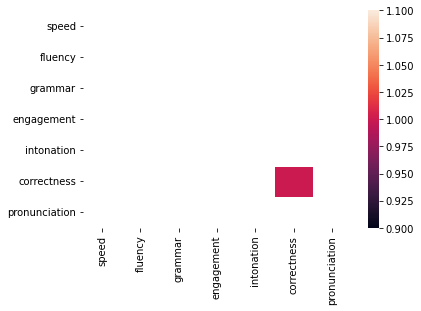

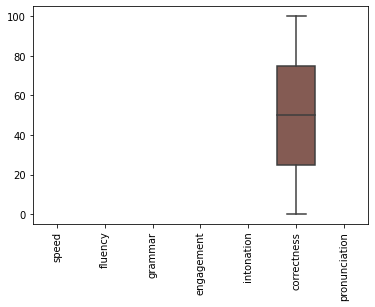

Mockathon: Writing an essay on a given topic.


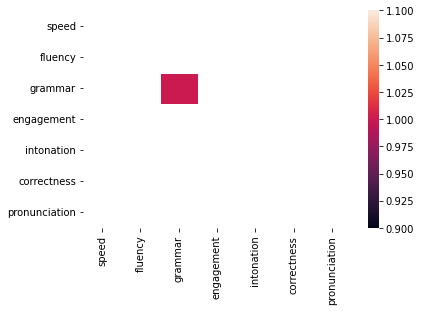

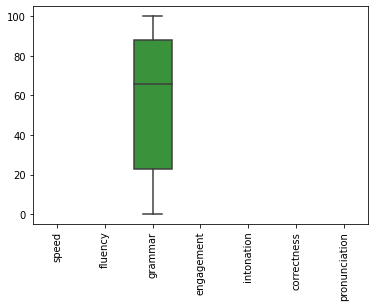

Feedback


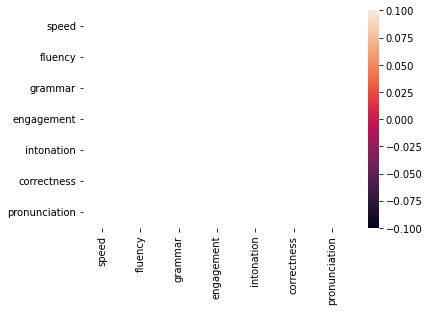

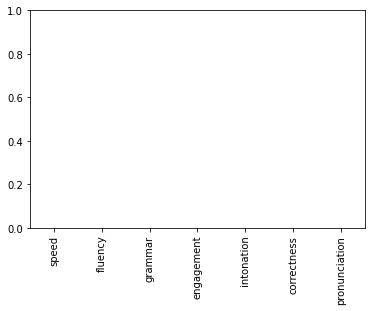

HR-Q1001B: Get to know you.


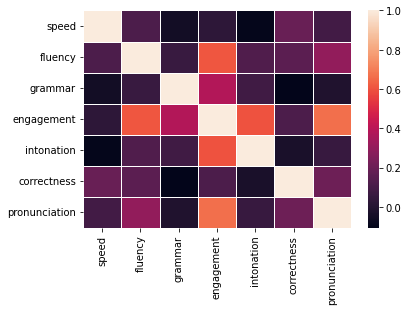

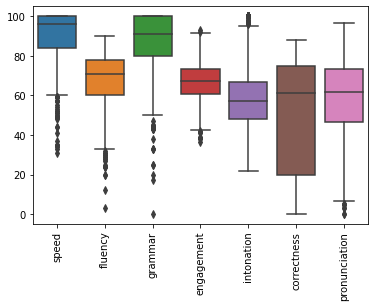

CS-Q1006B: OOP vs. PP


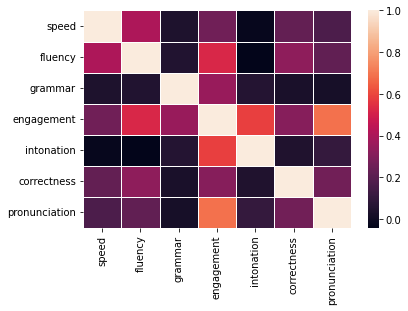

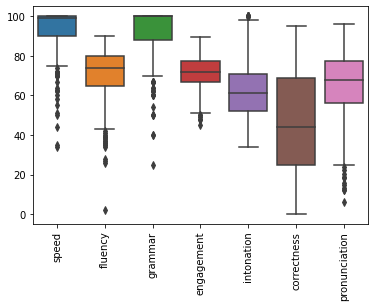

HR-Q1003B:  The Right Person


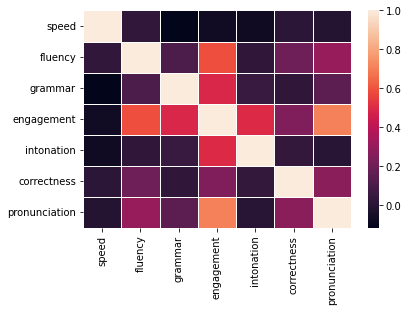

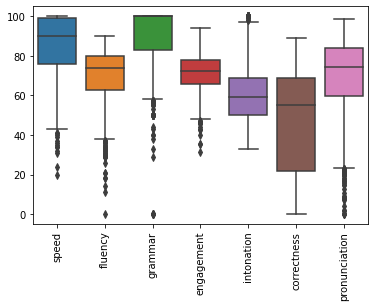

CS-Q1009B: NLP


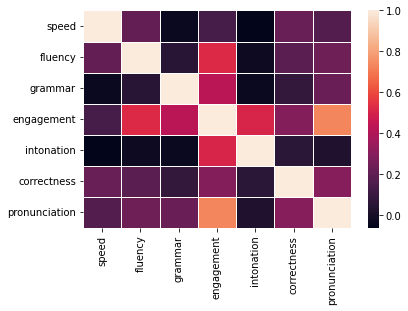

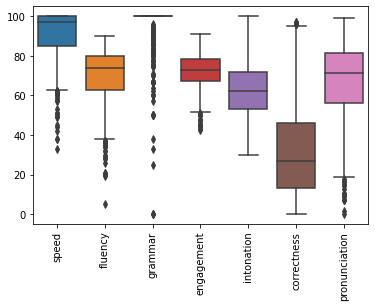

CS-Q1001B: SDLC


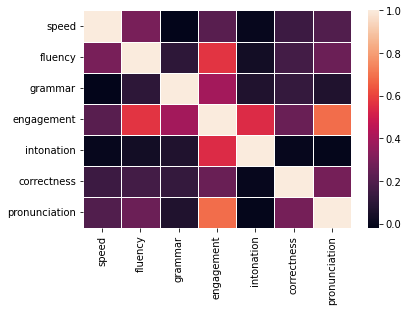

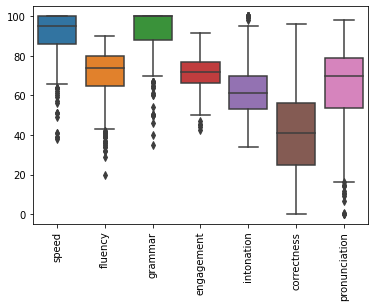

Chemistry GK: Name a few Petroleum products.


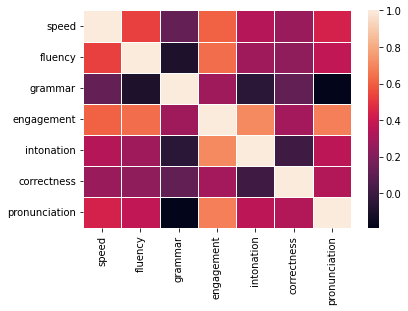

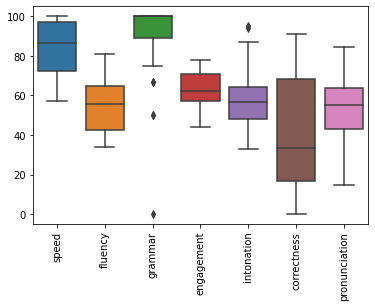

CS-Q1004B: For Loop vs. While Loop


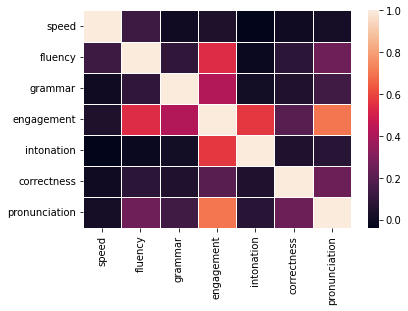

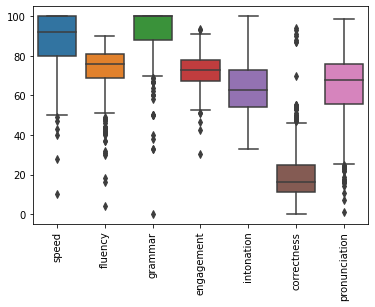

Math GK-1001: Percentages, Capital, and profits


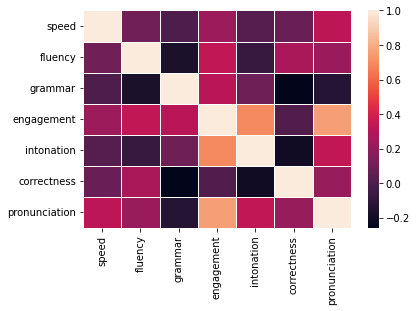

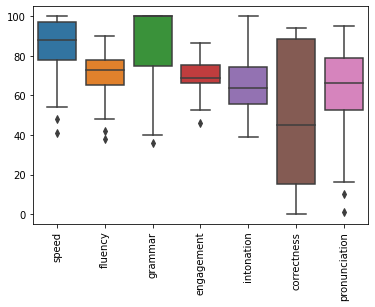

CS-Q1008B: sorting algorithms


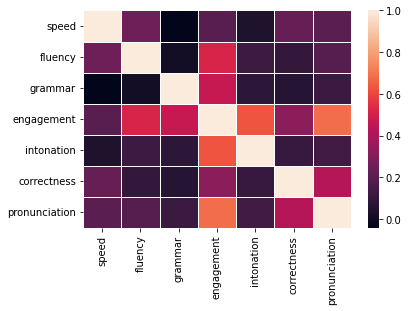

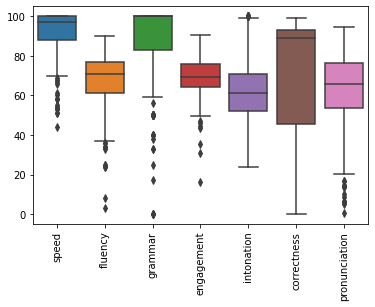

CS-Q1007B: Database


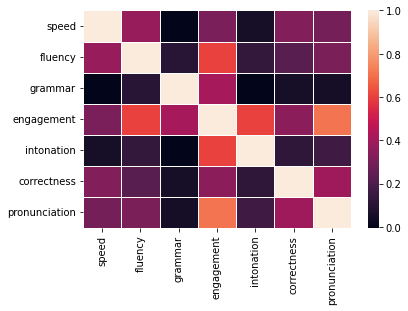

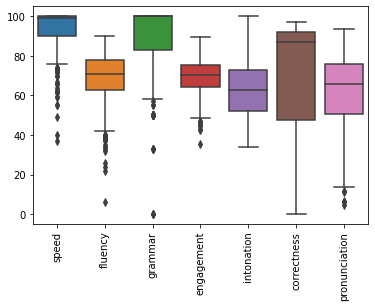

CS-Q1002B: call by reference


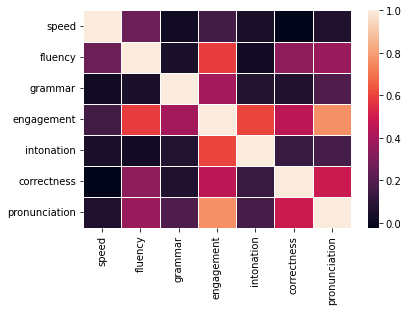

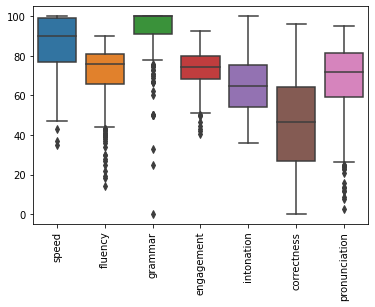

ChE-Q1023: Unit process


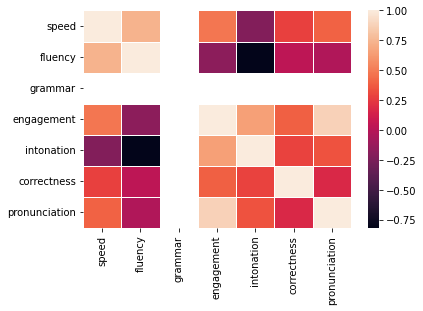

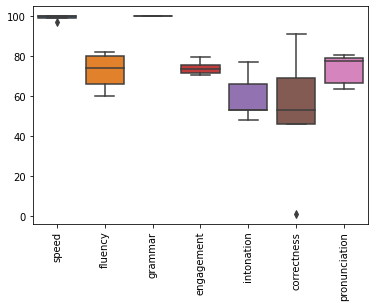

ChE-Q1021: SF


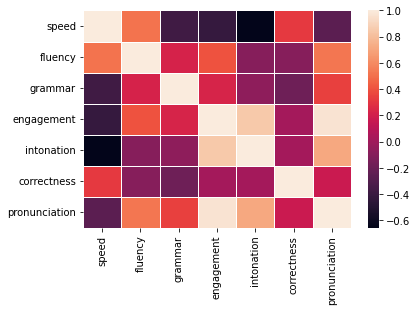

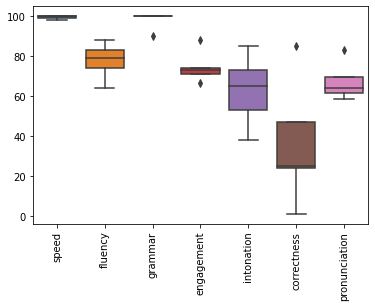

ChE-Q1022: Failure


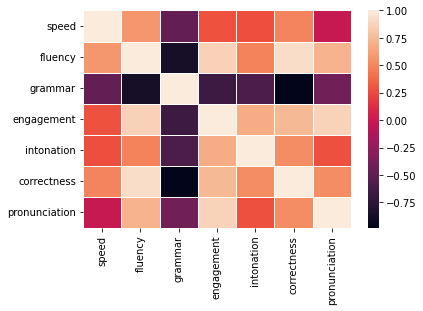

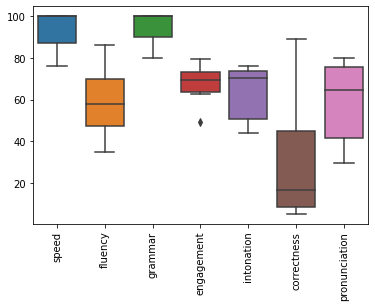

ChE-Q1025: Lithium Production


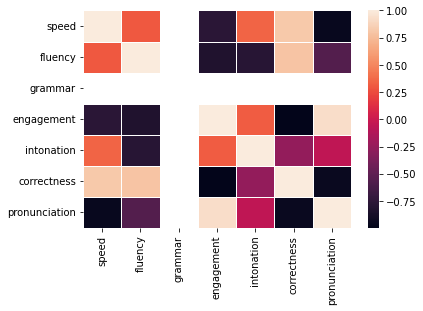

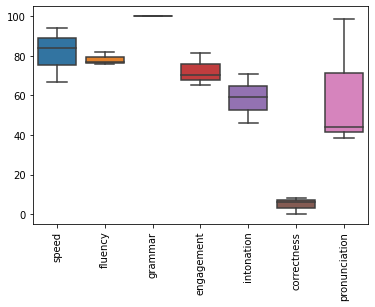

ChE-Q1024: Environmental Protection


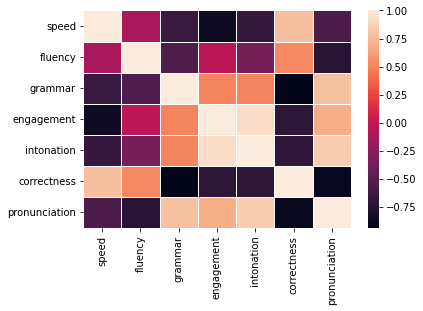

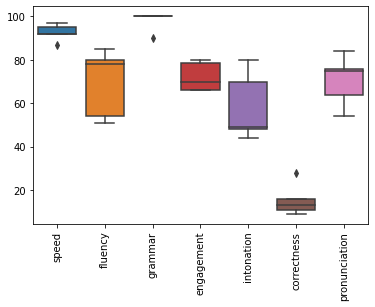

CE-Q1023: Factor of Safety


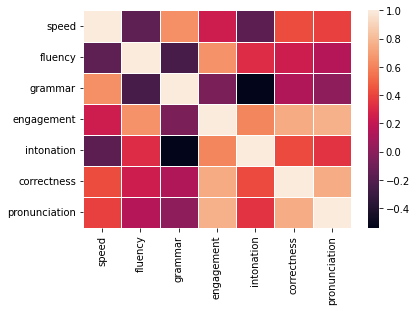

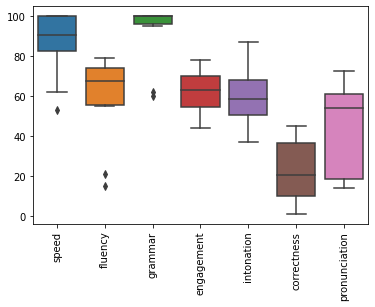

CE-Q1025: Reinforced Concrete


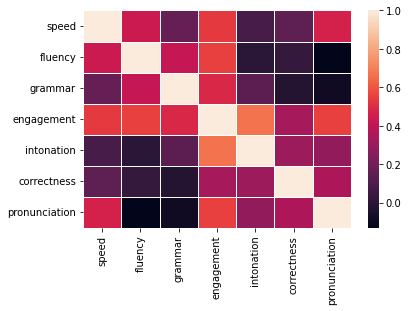

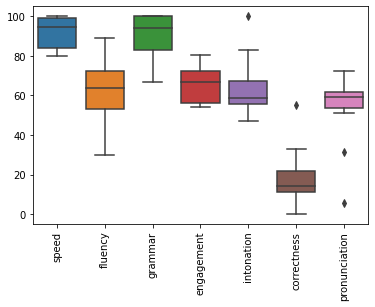

CE-Q1022: Structural Failure


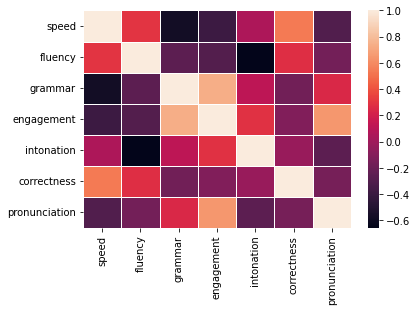

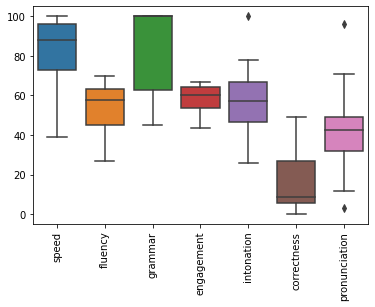

CE-Q1024: Cantilever


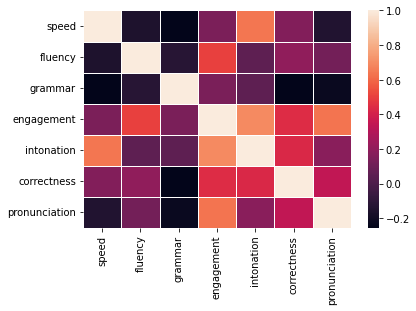

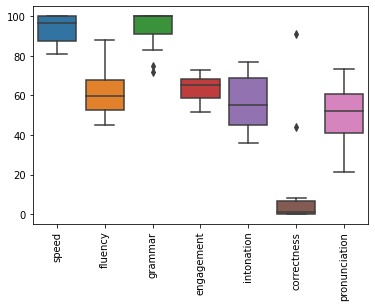

CE-Q1021: Design Parameters for Structures


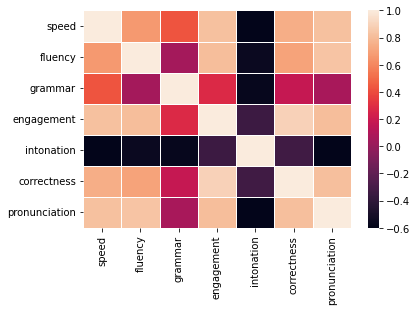

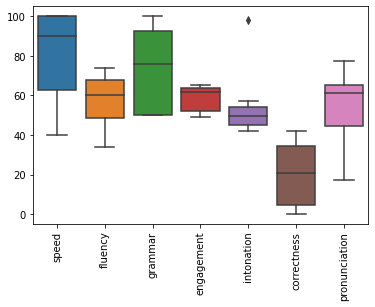

EE-Q1023: Power Diodes


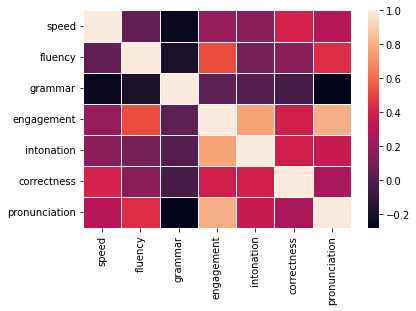

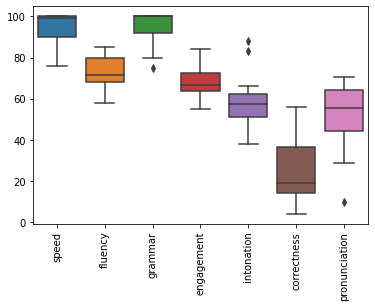

EE-Q1022: Transformer


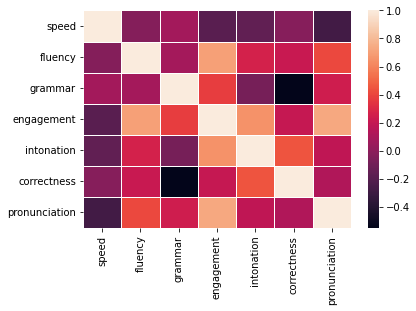

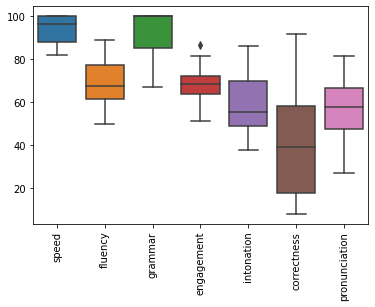

EE-Q1024: Grounding or Earthing


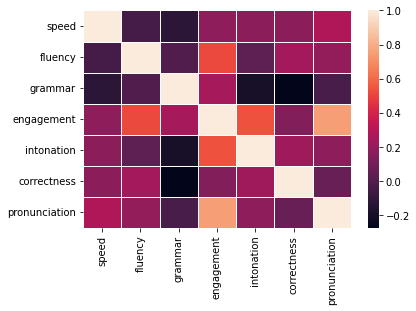

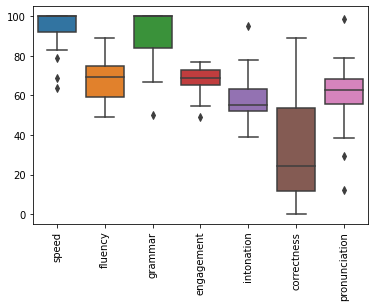

EE-Q1021: Kirchhoff's Laws


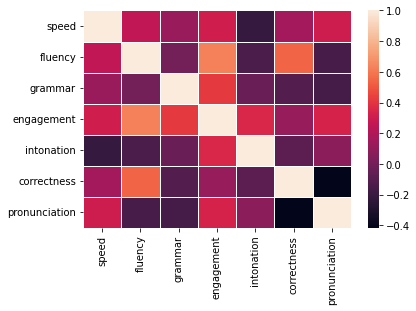

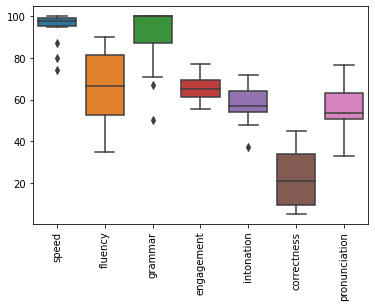

EE-Q1025: EV Motors


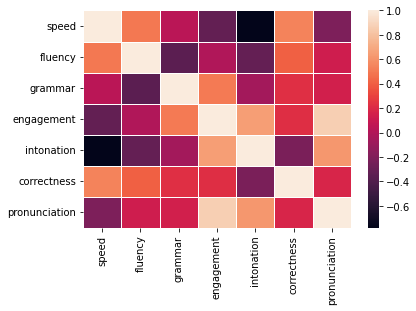

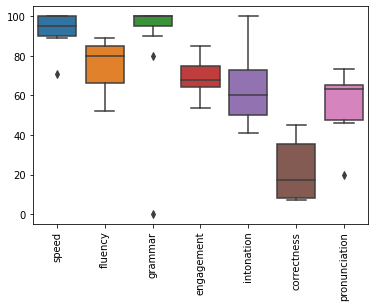

ME-Q1025B: Endurance Limit


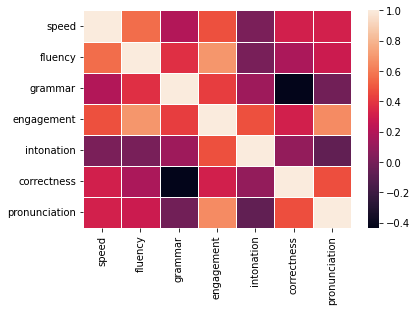

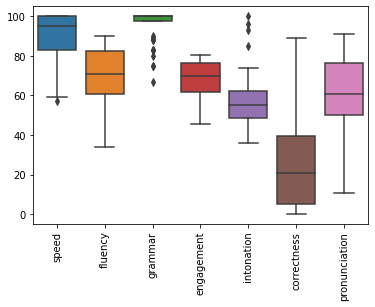

ME-Q1022B: Failure


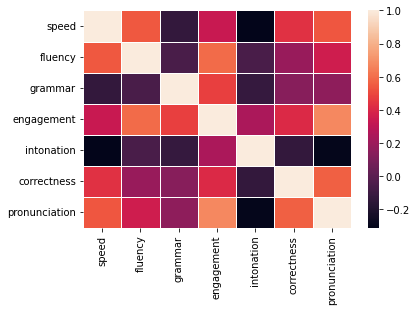

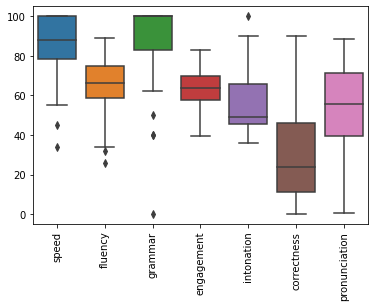

ME-Q1021B: Factor of safety


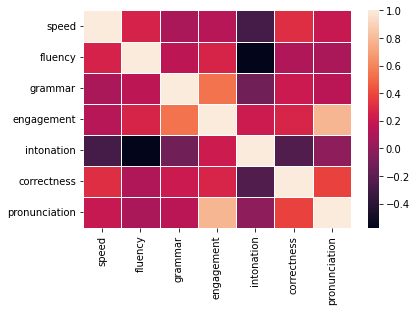

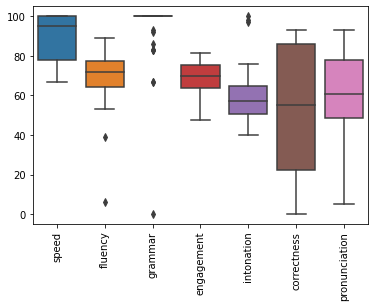

ME-Q1024B: Cantilever


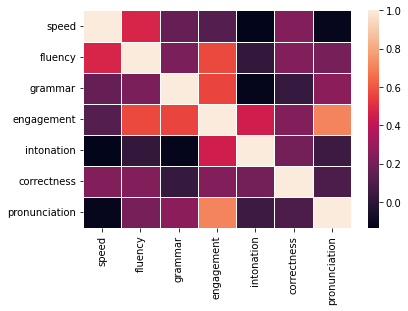

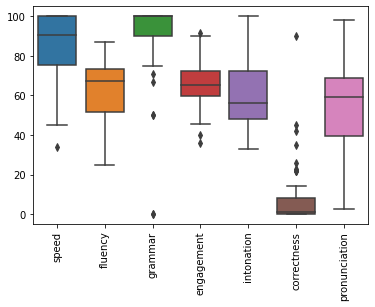

ME-Q1023B: Stress concentration


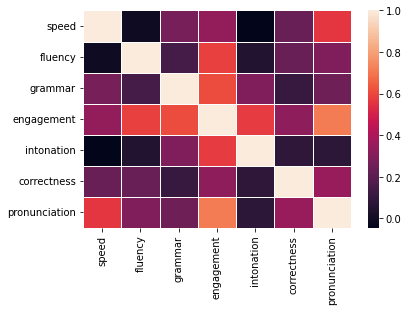

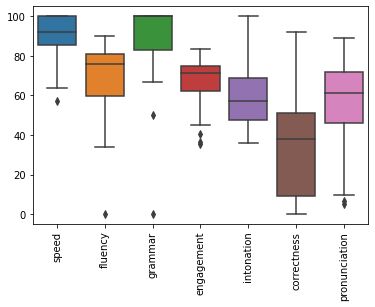

ECE-Q1021: Active Components


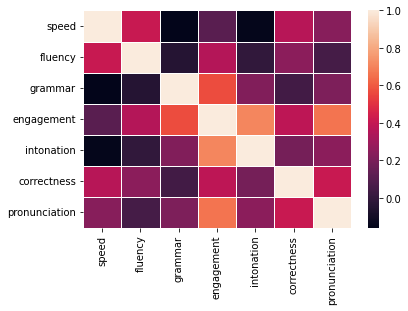

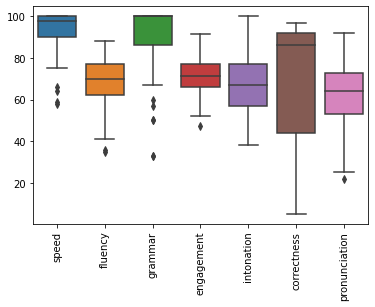

ECE-Q1022: Transistor


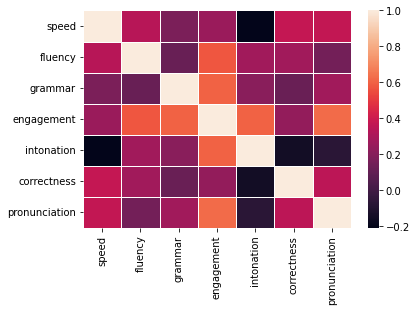

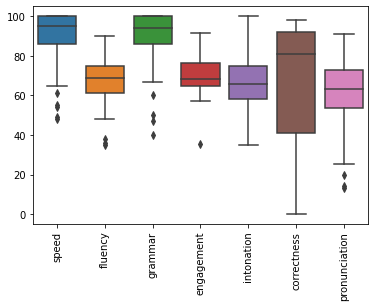

ECE-Q1024: Power Diode


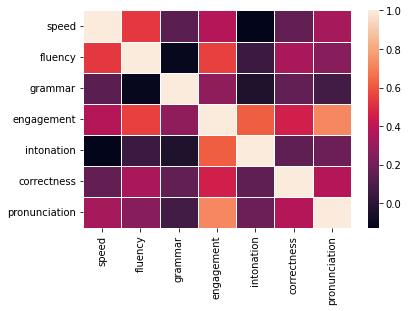

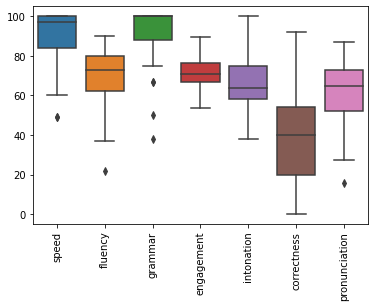

ECE-Q1023: Logic Gate


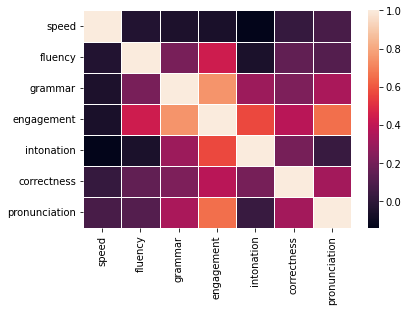

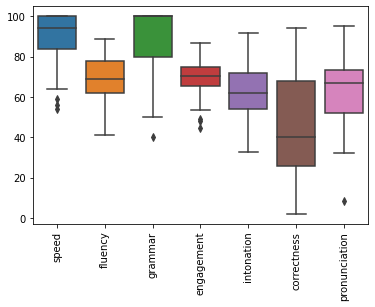

ECE-Q1025: IoT


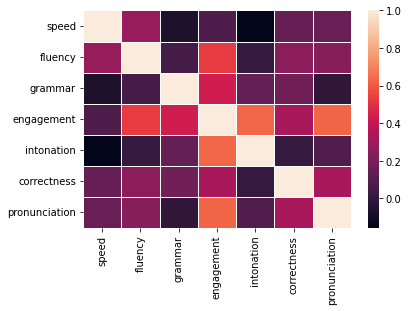

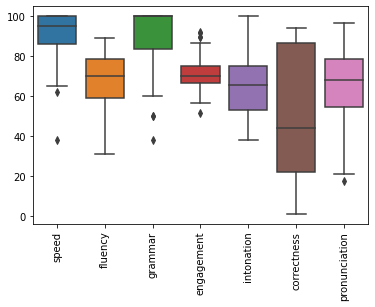

CSE-Q1022B: OOP


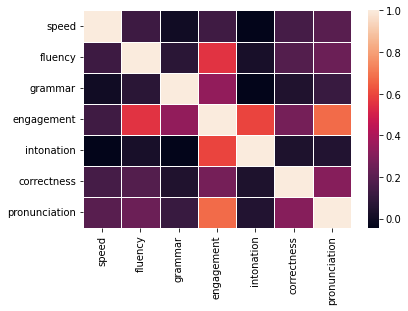

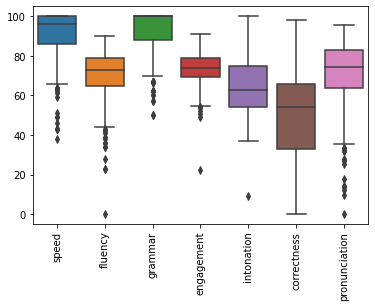

CSE-Q1027B: MVC


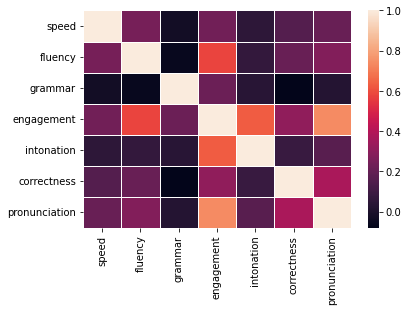

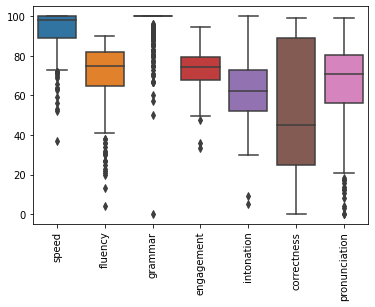

CSE-Q1026B: Singleton


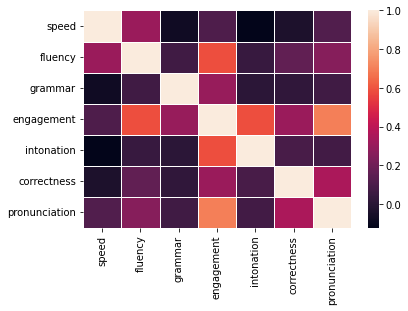

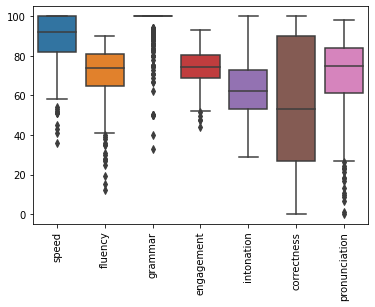

CSE-Q1024B: Index


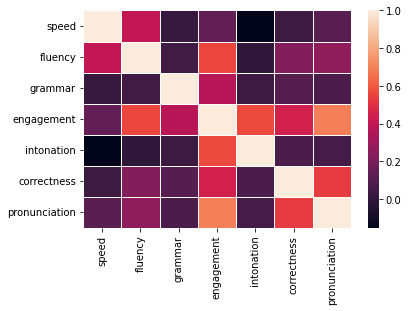

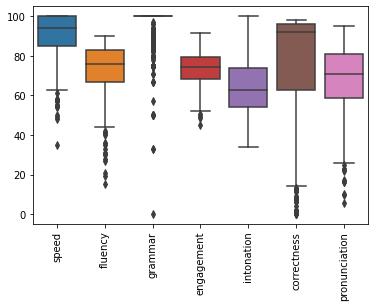

CSE-Q1028B: Interpreter vs. Compiler


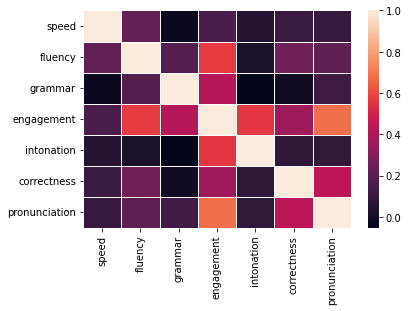

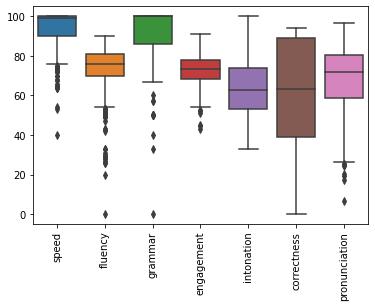

CSE-Q1029B: Overloading


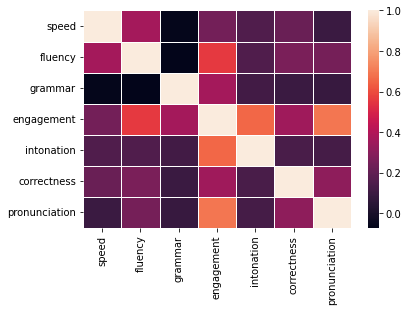

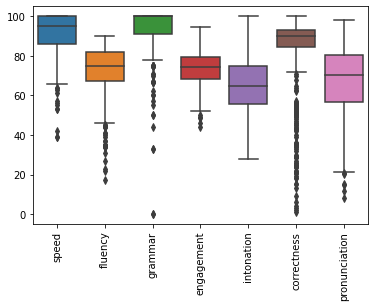

CSE-Q1025B: OSI


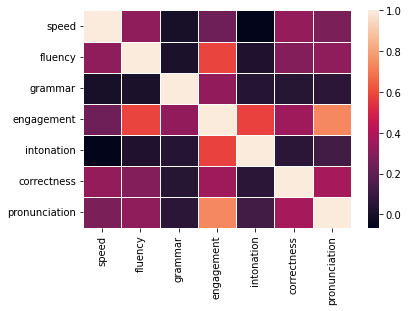

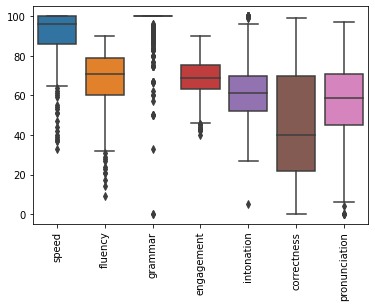

CSE-Q1030B: GitHub


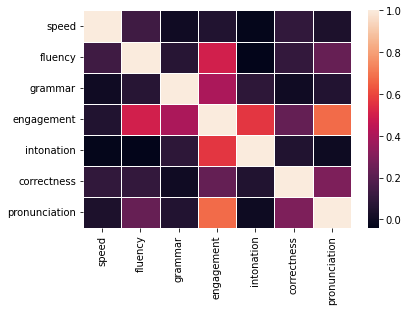

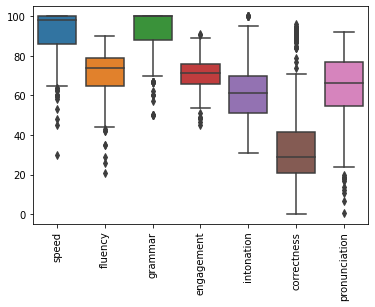

CSE-Q1023B: Polymorphism


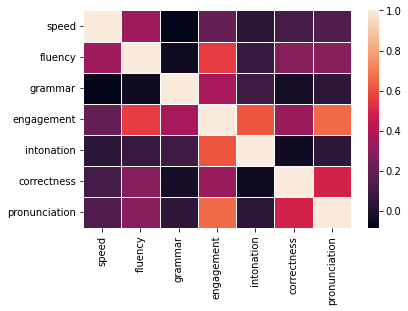

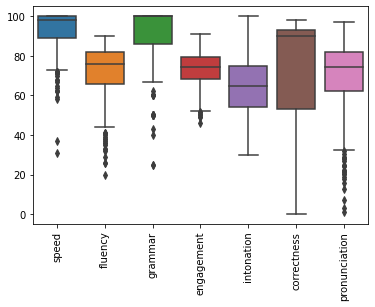

CSE-Q1021B: Array


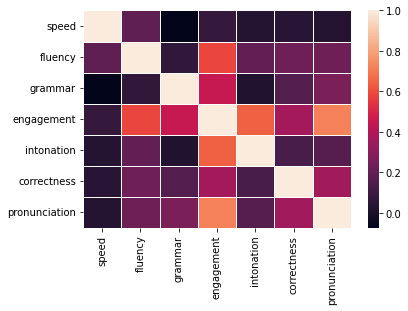

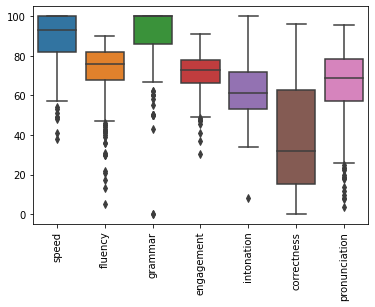

HR-Q1008B: Weakness


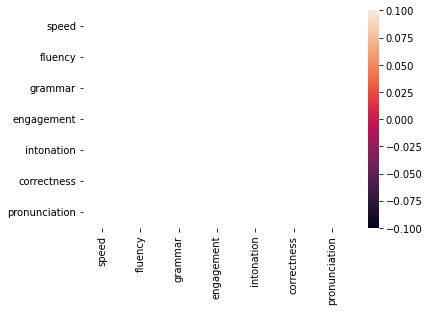

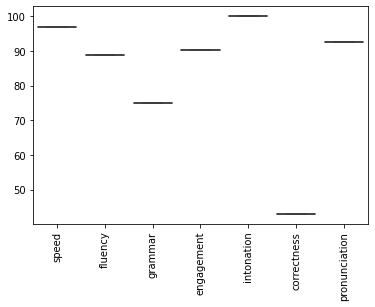

HR-Q1006B: Project


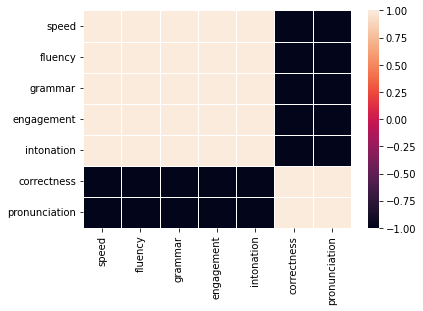

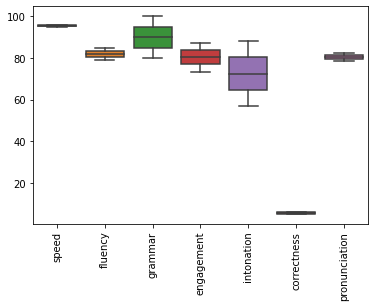

HR-Q1009B: Experience


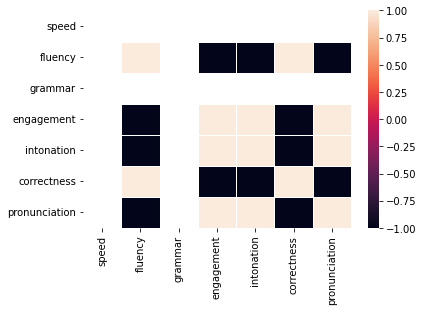

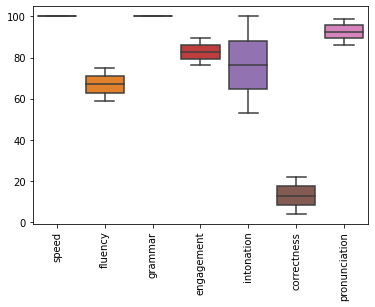

HR-Q1004B: Accomplishment


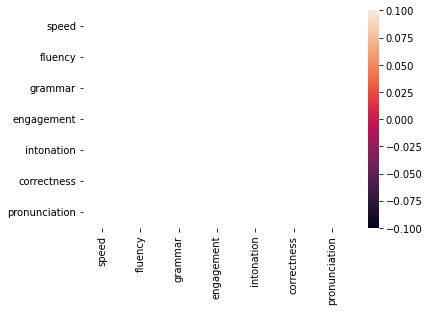

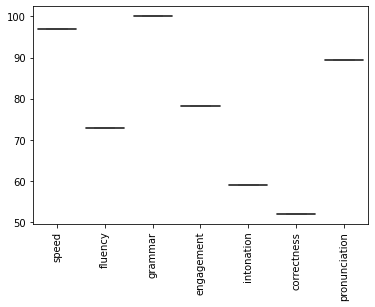

SLR - See, Listen, and Repeat: 3D Printing


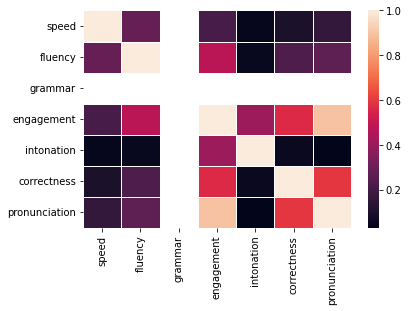

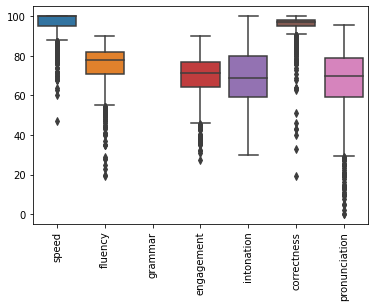

L&R - Listen & Repeat: How many elements in a smart phone? How many metals?


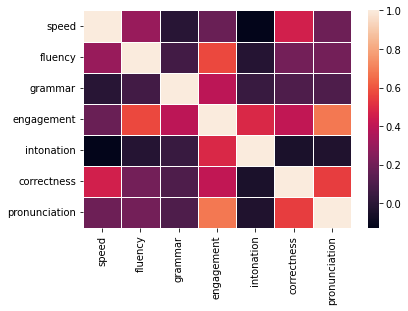

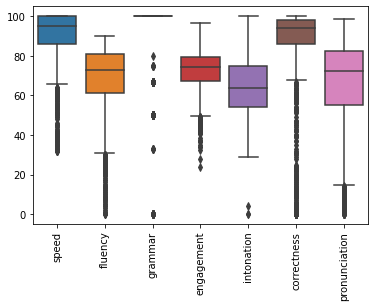

HR Question: Books you read


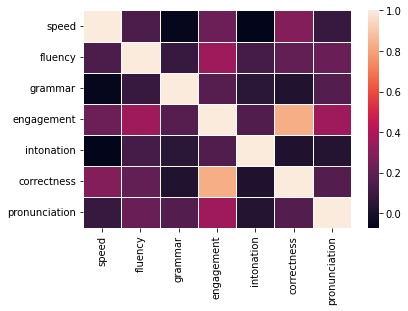

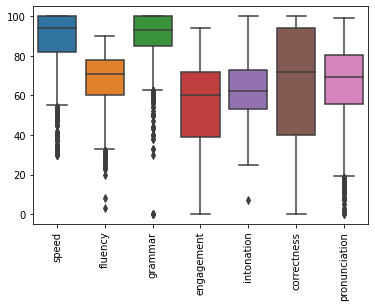

HR Question: Teamwork


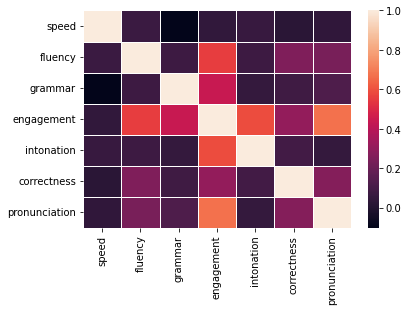

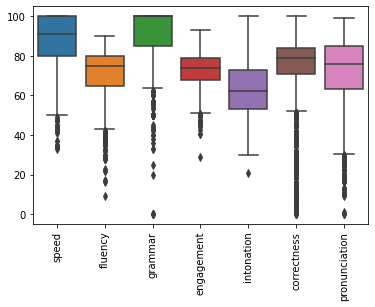

HR Question: Biggest Achievement


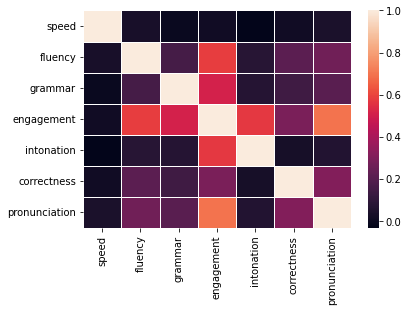

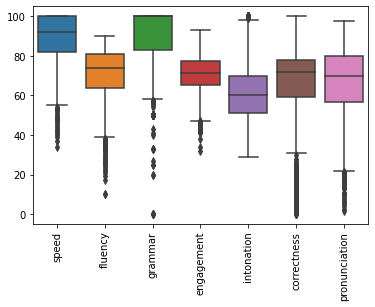

HR Question: Your Favorite Subjects


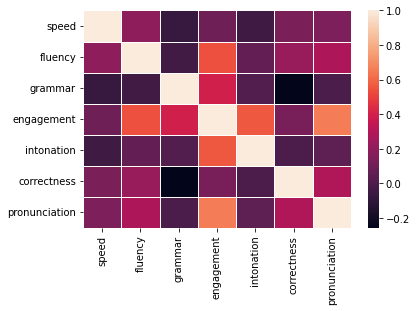

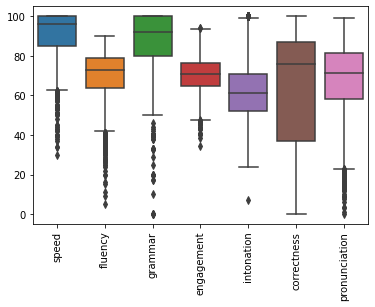

Read paragraph: Business Managers' Responsibilities


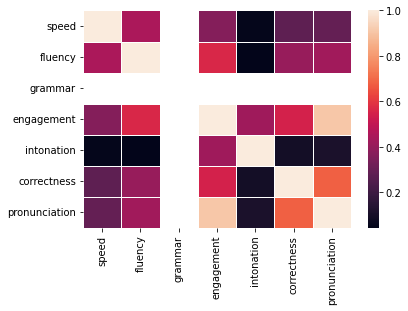

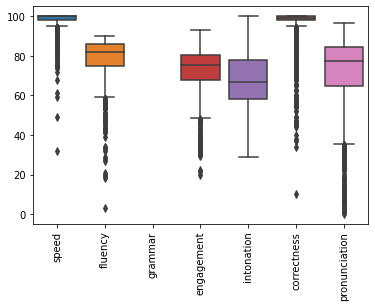

Fill in the Blanks with grammatically correct words.


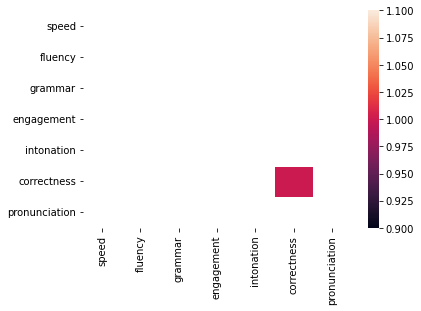

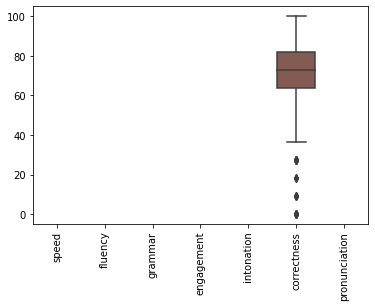

Essay Writing: Pollution control/Water conservation/Organic farming


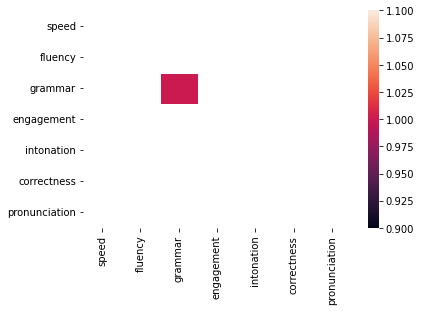

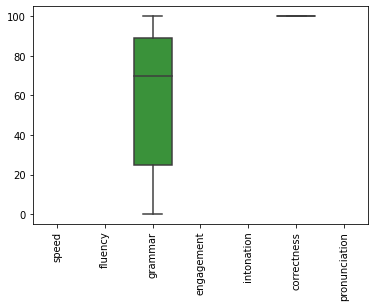

Books


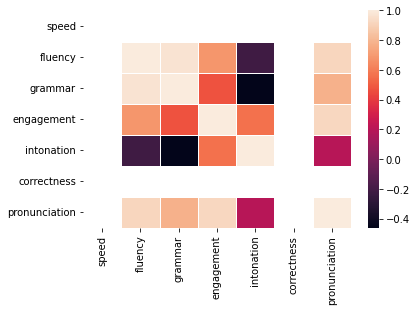

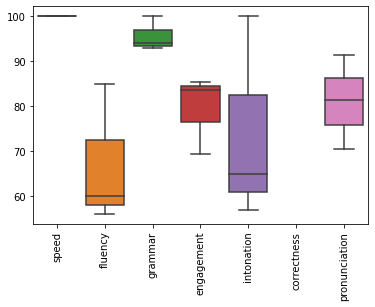

HR Q06B: Your answer - Biggest Achievement


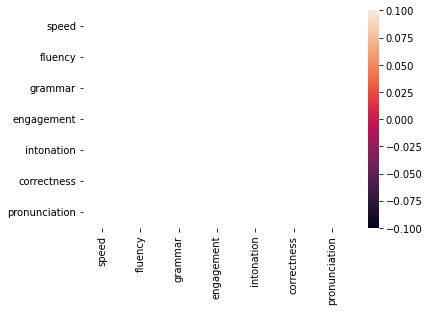

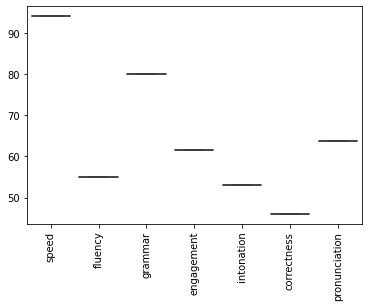

HR Q01B: Your answer- Teamwork


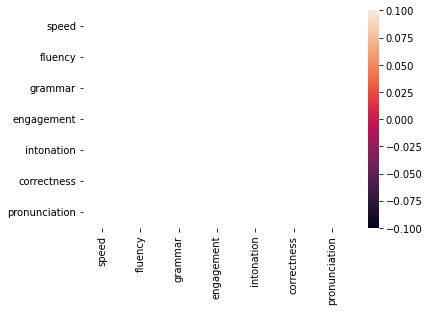

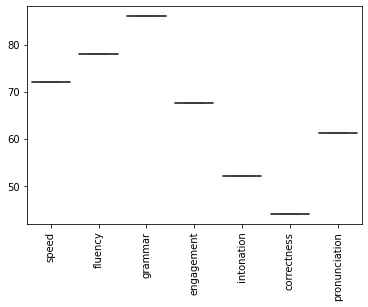

Essay 1


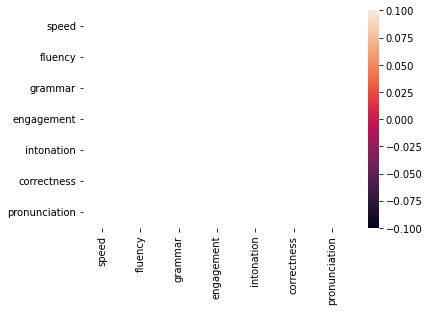

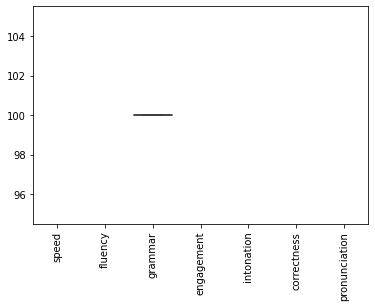

In [269]:
import matplotlib.pyplot as plt
score_list=pandas.DataFrame()
for qno in qnos:
    for item in score_param_list:
        temp_list=((data[data['qid'].isin([qno])&data['param'].isin([item])&data['col6'].isin(['score'])][:]['value']).tolist())
        score_list=concat_list_to_df(score_list,temp_list,item)
    score_list=score_list.apply(pandas.to_numeric,errors='coerce')
    print(qdict[qno])
    sns.heatmap(score_list.corr(),cbar=True,linewidths=0.5)
    plt.show()
    sns.boxplot(data=score_list).set_xticklabels(rotation=90,labels=score_param_list)
    plt.show()
    score_list=pandas.DataFrame()

In [164]:
data.to_csv("questions.csv",index=False)